In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import tifffile
from careamics import CAREamist
from careamics.config import create_n2v_configuration
from careamics_portfolio import PortfolioManager

## Import dataset

The SEM dataset is composed of a training and a validation image acquired in scanning 
electron microscopy (SEM), they were presented in Buchholtz et al (2019).    

In [2]:
# instantiate data portfolio manage
portfolio = PortfolioManager()

# and download the data
root_path = Path("./data")
files = portfolio.denoising.N2V_SEM.download(root_path)
print(f"List of downloaded files: {files}")

List of downloaded files: ['/Users/joran.deschamps/git/careamics/careamics-examples/applications/n2v/2D/data/denoising-N2V_SEM.unzip/train.tif', '/Users/joran.deschamps/git/careamics/careamics-examples/applications/n2v/2D/data/denoising-N2V_SEM.unzip/validation.tif']


### Visualize data

Train image shape: (2500, 1690)


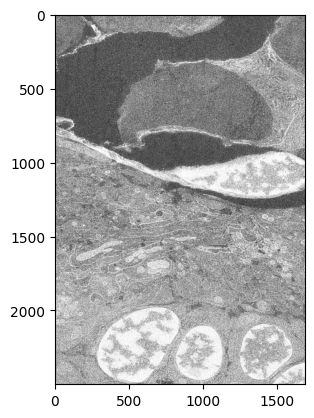

In [3]:
# Load images
train_image = tifffile.imread(files[0])
print(f"Train image shape: {train_image.shape}")
plt.imshow(train_image, cmap="gray")

Validation image shape: (471, 1690)


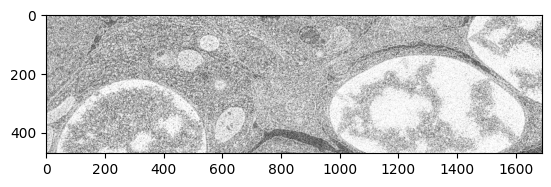

In [4]:
val_image = tifffile.imread(files[1])
print(f"Validation image shape: {val_image.shape}")
plt.imshow(val_image, cmap="gray")

## Train with CAREamics


### Create configuration

In [7]:
use_n2v2 = True  # change to False to use N2V

config = create_n2v_configuration(
    experiment_name="sem_n2v" if not use_n2v2 else "sem_n2v2",
    data_type="tiff",
    axes="YX",
    patch_size=(64, 64),
    batch_size=32,
    num_epochs=20,
    use_n2v2=use_n2v2,
)

print(config)

{'algorithm_config': {'algorithm': 'n2v',
                      'loss': 'n2v',
                      'lr_scheduler': {'name': 'ReduceLROnPlateau',
                                       'parameters': {}},
                      'model': {'architecture': 'UNet',
                                'conv_dims': 2,
                                'depth': 2,
                                'final_activation': 'None',
                                'in_channels': 1,
                                'independent_channels': True,
                                'n2v2': True,
                                'num_channels_init': 32,
                                'num_classes': 1},
                      'optimizer': {'name': 'Adam',
                                    'parameters': {'lr': 0.0001}}},
 'data_config': {'axes': 'YX',
                 'batch_size': 32,
                 'data_type': 'tiff',
                 'patch_size': [64, 64],
                 'transforms': [{'mean': 0.485,
        

### Instantiate CAREamics

In [8]:
careamist = CAREamist(source=config)

No working directory provided. Using current working directory: /Users/joran.deschamps/git/careamics/careamics-examples/applications/n2v/2D.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/joran.deschamps/miniconda3/envs/careamics/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


### Train

In [ ]:
careamist.train(
    train_source=train_image,
    val_source=val_image,
)

## Predict with CAREamics


In [ ]:
prediction = careamist.predict(source=train_image, tile_size=(256, 256))

### Visualize the prediction

In [ ]:
# Show the full image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(train_image, cmap="gray")
ax[1].imshow(prediction.squeeze(), cmap="gray")

In [ ]:
# Show a crop
y_start = 200
y_end = 450
x_start = 600
x_end = 850

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(train_image[y_start:y_end, x_start:x_end], cmap="gray")
ax[1].imshow(prediction.squeeze()[y_start:y_end, x_start:x_end], cmap="gray")

In [ ]:
# Show residuals
plt.imshow(prediction.squeeze() - train_image, cmap="gray")

## Export the model

In [ ]:
careamist.export_to_bmz(
    path="sem_n2v_model.zip",
    name="SEM_N2V",
    authors=[{"name": "CAREamics authors", "affiliation": "Human Technopole"}],
)